<a href="https://colab.research.google.com/github/mteoraso/Practicas_DataScience/blob/GPU_projects/Espiral_Ulam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

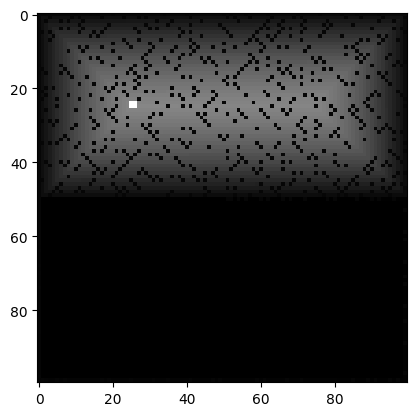

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def es_primo(n):
  """Verifica si un número es primo."""
  if n <= 1:
    return False
  if n == 2:
    return True
  if n % 2 == 0:
    return False
  max_divisor = int(np.sqrt(n)) + 1
  for d in range(3, max_divisor, 2):
    if n % d == 0:
      return False
  return True

def generar_espiral_ulam_gpu(tamano):
  """Genera la espiral de Ulam usando la GPU."""
  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  espiral = torch.zeros((tamano, tamano), dtype=torch.int32, device=device)
  centro = tamano // 2
  num = 1
  pasos = [(0, 1), (1, 0), (0, -1), (-1, 0)]
  paso_actual = 0
  x, y = centro, centro
  while num <= tamano * tamano:
    espiral[x, y] = num
    # Si es primo, se marca con 255 para que se vea en la gráfica.
    # Si no es primo, se mantiene el número original.
    if es_primo(num):
      espiral[x, y] = 255
    dx, dy = pasos[paso_actual]
    nx, ny = x + dx, y + dy
    if 0 <= nx < tamano and 0 <= ny < tamano and espiral[nx, ny] == 0:
      x, y = nx, ny
    else:
      paso_actual = (paso_actual + 1) % 4
      dx, dy = pasos[paso_actual]
      x, y = x + dx, y + dy
    num += 1
  return espiral.cpu().numpy()

# Generar la espiral
tamano = 100  # Ajustar el tamaño de la espiral.
espiral = generar_espiral_ulam_gpu(tamano)

# Mostrar la espiral
plt.imshow(espiral, cmap='gray')  # Se puede cambiar el color de la espiral.
plt.show()